## Data Representation in Scikit-learn

In [6]:
#Data as a table
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the dataset
iris = datasets.load_iris()

#Converting the dataset into a dataframe
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['species'])
iris.head(5)

#Replacing the data in the species column with spesies names
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species == 1.0, 'versicolor','virginica'))
iris.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

## Features Matrix
This is a two dimensional numerical array or matrix used to represent information in scikit learn. By convention,this features matrix is often stored in a variable named X. The features matrix is assumed to be two-dimensional, with shape [n_samples, n_features], and is most often contained in a NumPy array or a Pandas DataFrame.

The samples (i.e., rows) always refer to the individual objects described by the dataset.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.

## Target Array
In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series.

The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, it is the dependent variable.

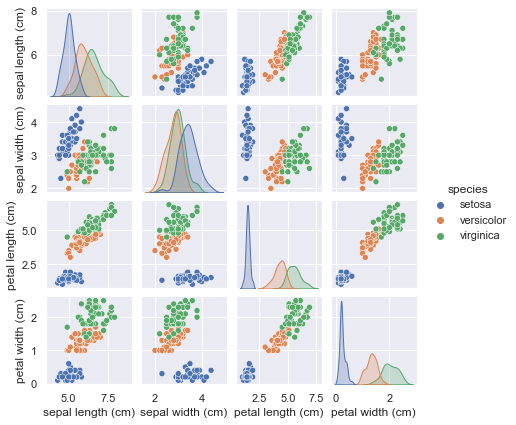

In [9]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue = 'species', height = 1.5);

In [12]:
#For use in Scikit-Learn, we will extract the features matrix and target array from the DataFrame
#Feature matrix
X_iris = iris.drop('species', axis =1)
X_iris.shape

#Target array
y_iris = iris['species']
y_iris.shape

(150,)

## Basics of using the Scikit-learn Estimator API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows :
1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
    • For supervised learning, often we predict labels for unknown data using the predict() method.
    • For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

## Supervised Learning Example: Simple Linear Regression

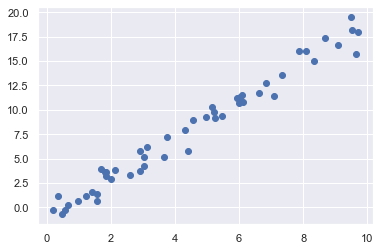

In [13]:
#Linear regression example
rng = np.random.RandomState(42)

x = 10*rng.rand(50)
y = 2*x - 1 + rng.randn(50)

plt.scatter(x, y)

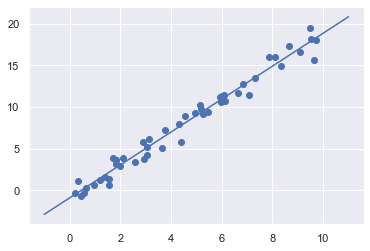

In [21]:
#Choose a class of model(In this case a linear regression class)
from sklearn.linear_model import LinearRegression

#Choose model hyperparameters
model = LinearRegression(fit_intercept = True)
model

#Arrange data into a features matrix and target vector. Reshape the features matrix.
X =x[:, np.newaxis]
X.shape

#Fit the model to data
model.fit(X, y)
model.coef_
model.intercept_

#Predict labels of unknown data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]

yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);